In [4]:
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

dat_1 = pd.read_csv('data_1.csv')
dat_2 = pd.read_csv('data_2.csv')
dat_3 = pd.read_csv('data_3.csv')
dat_4 = pd.read_csv('data_4.csv')
dat_5 = pd.read_csv('data_5.csv')

dat_1 = dat_1.sample(frac=1, random_state=0, ignore_index=True)
dat_2 = dat_2.sample(frac=1, random_state=0, ignore_index=True)
dat_3 = dat_3.sample(frac=1, random_state=0, ignore_index=True)
dat_4 = dat_4.sample(frac=1, random_state=0, ignore_index=True)
dat_5 = dat_5.sample(frac=1, random_state=0, ignore_index=True)

In [5]:
dat_1

,Unnamed: 0.1,Unnamed: 0,X_Max,Y_Max,Dist_Max,X_Min,Y_Min,Dist_Min,X_Mean,Y_Mean,Dist_Mean,X_Var,Y_Var,Dist_Var,Answer,subject
0,2756,1429,8265.031860,11073.022181,9.365245e+04,10.797062,1356.707385,-3.906250e+04,3083.868293,4773.978001,21016.527543,7.216222e+06,1.197573e+07,2.076448e+09,map,1
1,6469,5142,16883.826281,14769.785362,5.318560e+05,6544.847568,5496.096413,-2.770083e+03,12244.024305,10852.182313,70871.178164,1.236658e+07,9.423609e+06,2.648324e+10,map,1
2,5057,3730,7083.856598,21224.890242,5.843682e+03,420.870617,5150.372162,-1.040583e+04,3725.057810,15102.275287,-3543.228810,6.936779e+06,3.310005e+07,3.654258e+07,map,1
3,5414,4087,15624.936488,13013.694835,9.739854e+05,5221.459344,824.941492,-1.040583e+04,10107.137330,5899.242604,110218.280625,1.363850e+07,1.843224e+07,9.249708e+10,map,1
4,5322,3995,34668.819963,62065.646052,1.171875e+05,542.684422,791.822664,-6.454294e+05,13445.487456,17272.852320,-62946.501266,1.232230e+08,3.054143e+08,4.438650e+10,map,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,4931,3604,18442.096373,8086.602472,4.162331e+03,7174.800968,4226.943463,-2.382934e+06,12044.282723,6665.756036,-278259.235014,1.061342e+07,1.419317e+06,5.496624e+11,map,1
6609,3264,1937,4063.902983,17052.619688,6.689751e+05,30.874248,8675.524403,-3.652301e+04,1608.375988,12433.124207,62367.265529,1.698946e+06,7.771470e+06,4.590576e+10,map,1
6610,1653,326,23347.058728,55930.204690,2.869927e+06,702.109691,97.905062,-1.061394e+05,10353.626583,12189.412010,286002.206282,5.685114e+07,2.455669e+08,8.271624e+11,map,1
6611,2607,1280,10099.485517,71950.927377,5.540166e+03,233.407075,5806.162899,-9.375000e+04,3969.349698,22613.273557,-14577.569008,1.409814e+07,3.255982e+08,8.118428e+08,map,1


In [2]:
dat_df_1_0 = dat_2.append(dat_3)
dat_df_1_1 = dat_df_1_0.append(dat_4)
dat_df_1_2 = dat_df_1_1.append(dat_5)
dat_df_1 = dat_df_1_2.append(dat_1)

In [3]:
dat_df_1

,Unnamed: 0.1,Unnamed: 0,X_Max,Y_Max,Dist_Max,X_Min,Y_Min,Dist_Min,X_Mean,Y_Mean,Dist_Mean,X_Var,Y_Var,Dist_Var,Answer,subject
0,4397,3066,19897.794376,7314.394218,-2.081165e+03,3085.498631,26.317839,-6.018992e+05,10803.892684,3470.969068,-99886.653673,3.695198e+07,8.083866e+06,3.391623e+10,map,2
1,5640,4309,1144.171009,3253.230195,6.243496e+03,103.292703,368.049600,-5.859375e+03,530.576366,1574.758218,2082.095923,1.264156e+05,9.292002e+05,1.161026e+07,map,2
2,1835,504,11877.959030,16547.901944,1.040583e+04,281.929970,1799.437556,-3.329865e+04,6778.492382,9852.975965,-1467.477088,1.669252e+07,2.385780e+07,1.603911e+08,map,2
3,4376,3045,34661.253622,8318.946206,2.330703e+05,1403.697448,897.497351,-3.330579e+06,14602.909724,3829.717109,-418526.877803,1.036929e+08,6.650591e+06,1.177661e+12,map,2
4,3682,2351,7046.610117,5584.145188,5.279421e+05,780.206813,2910.278511,-5.223725e+05,3488.309643,4138.794432,-17097.721269,3.846665e+06,7.480799e+05,6.559188e+10,map,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,4931,3604,18442.096373,8086.602472,4.162331e+03,7174.800968,4226.943463,-2.382934e+06,12044.282723,6665.756036,-278259.235014,1.061342e+07,1.419317e+06,5.496624e+11,map,1
6609,3264,1937,4063.902983,17052.619688,6.689751e+05,30.874248,8675.524403,-3.652301e+04,1608.375988,12433.124207,62367.265529,1.698946e+06,7.771470e+06,4.590576e+10,map,1
6610,1653,326,23347.058728,55930.204690,2.869927e+06,702.109691,97.905062,-1.061394e+05,10353.626583,12189.412010,286002.206282,5.685114e+07,2.455669e+08,8.271624e+11,map,1
6611,2607,1280,10099.485517,71950.927377,5.540166e+03,233.407075,5806.162899,-9.375000e+04,3969.349698,22613.273557,-14577.569008,1.409814e+07,3.255982e+08,8.118428e+08,map,1


In [6]:

X = dat_df_1[['X_Max', 'Y_Max', 'Dist_Max', 'X_Min', 'Y_Min', 'Dist_Min', 'X_Mean', 'Y_Mean', 'Dist_Mean', 'X_Var', 'Y_Var', 'Dist_Var']]
y = dat_df_1['Answer']
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False, test_size=6613, random_state=0)

X_test

,X_Max,Y_Max,Dist_Max,X_Min,Y_Min,Dist_Min,X_Mean,Y_Mean,Dist_Mean,X_Var,Y_Var,Dist_Var
0,8265.031860,11073.022181,9.365245e+04,10.797062,1356.707385,-3.906250e+04,3083.868293,4773.978001,21016.527543,7.216222e+06,1.197573e+07,2.076448e+09
1,16883.826281,14769.785362,5.318560e+05,6544.847568,5496.096413,-2.770083e+03,12244.024305,10852.182313,70871.178164,1.236658e+07,9.423609e+06,2.648324e+10
2,7083.856598,21224.890242,5.843682e+03,420.870617,5150.372162,-1.040583e+04,3725.057810,15102.275287,-3543.228810,6.936779e+06,3.310005e+07,3.654258e+07
3,15624.936488,13013.694835,9.739854e+05,5221.459344,824.941492,-1.040583e+04,10107.137330,5899.242604,110218.280625,1.363850e+07,1.843224e+07,9.249708e+10
4,34668.819963,62065.646052,1.171875e+05,542.684422,791.822664,-6.454294e+05,13445.487456,17272.852320,-62946.501266,1.232230e+08,3.054143e+08,4.438650e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
6608,18442.096373,8086.602472,4.162331e+03,7174.800968,4226.943463,-2.382934e+06,12044.282723,6665.756036,-278259.235014,1.061342e+07,1.419317e+06,5.496624e+11
6609,4063.902983,17052.619688,6.689751e+05,30.874248,8675.524403,-3.652301e+04,1608.375988,12433.124207,62367.265529,1.698946e+06,7.771470e+06,4.590576e+10
6610,23347.058728,55930.204690,2.869927e+06,702.109691,97.905062,-1.061394e+05,10353.626583,12189.412010,286002.206282,5.685114e+07,2.455669e+08,8.271624e+11
6611,10099.485517,71950.927377,5.540166e+03,233.407075,5806.162899,-9.375000e+04,3969.349698,22613.273557,-14577.569008,1.409814e+07,3.255982e+08,8.118428e+08


In [7]:
forest = RandomForestClassifier()
forest=forest.fit(X_train, y_train)
pred = forest.predict(X_test)

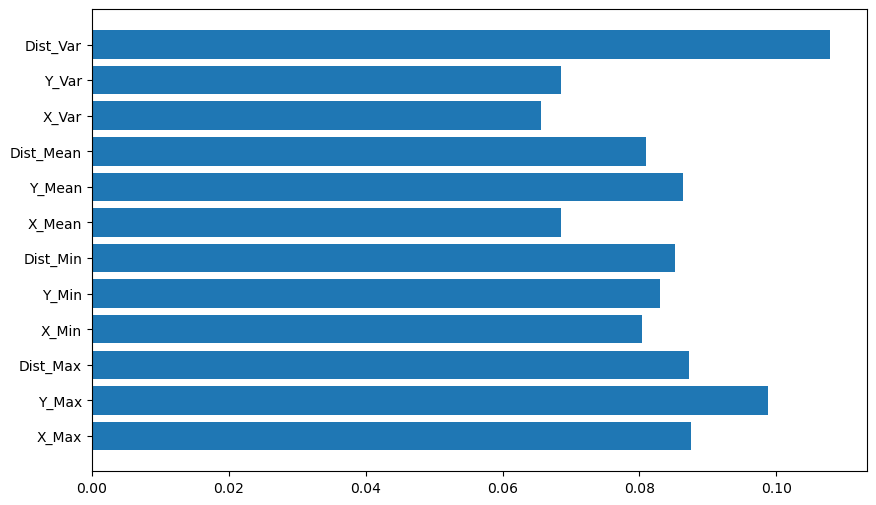

In [8]:
import matplotlib.pyplot as plt

labels = X_train.columns
importances = forest.feature_importances_

plt.figure(figsize = (10,6))
plt.barh(y = range(len(importances)), width = importances)
plt.yticks(ticks = range(len(labels)), labels = labels)
plt.show()

In [9]:
print(metrics.accuracy_score(y_test,pred))
print(metrics.precision_score(y_test, pred, average=None))
print(metrics.recall_score(y_test, pred, average=None))
print(metrics.f1_score(y_test, pred, average=None))

0.7786178738847724
[0.80912326 0.34106729]
[0.94627317 0.11077619]
[0.87234043 0.16723549]


In [10]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         map       0.81      0.95      0.87      5286
    password       0.34      0.11      0.17      1327

    accuracy                           0.78      6613
   macro avg       0.58      0.53      0.52      6613
weighted avg       0.72      0.78      0.73      6613



In [13]:
import pydot
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython import display

In [12]:
for i,val in enumerate(forest.estimators_):
    tree.export_graphviz(forest.estimators_[i], out_file='tree%d.dot'%i)
    

In [17]:
import pydotplus
from IPython.display import Image
 
graph = pydotplus.graphviz.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.771878 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.771878 to fit

